In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")
sns.set_theme()

In [2]:
df = pd.read_csv('transcriptomics_fractions.csv')
df1 = pd.read_csv('samples_transcriptomics.csv', index_col='Unnamed: 0')
df2 = pd.read_csv('Ecoli_gene_functional_annotations.csv', encoding = 'cp1252', index_col='Unnamed: 0')

In [3]:
df_renamed = df.rename(columns={'Unnamed: 0': 'gene'})
df2_sorted = df2.dropna(subset=['gene']).sort_values(by='gene', ascending=True).reset_index(drop=True)

In [4]:
df_join = df2_sorted.merge(df_renamed, how='inner', on='gene')
df2_plus_df = df_join.set_index('gene')

In [5]:
dfE = df2_plus_df.iloc[:,:7]
dfG = df2_plus_df.iloc[:,7:]

In [6]:
Alim = dfG.iloc[:,:7]
#Alim['Growth.rate']= list(df1['Growth.rate..1.h.'][:7])
dfE_plus_Alim = dfE.merge(Alim, how='inner', on='gene')
Alim_sor = dfE_plus_Alim.sort_values(by='cog_functional_cat', ascending=True)


Clim = dfG.iloc[:,7:17]
#Clim['Growth.rate']= list(df1['Growth.rate..1.h.'][7:17])
dfE_plus_Clim = dfE.merge(Clim, how='inner', on='gene')
Clim_sor = dfE_plus_Clim.sort_values(by='cog_functional_cat', ascending=True)

Rlim = dfG.iloc[:,17:28]
#Rlim['Growth.rate']= list(df1['Growth.rate..1.h.'][17:29])
dfE_plus_Rlim = dfE.merge(Rlim, how='inner', on='gene')
Clim_sor = dfE_plus_Rlim.sort_values(by='cog_functional_cat', ascending=True)

In [ ]:
func = Alim_sor['cog_functional_cat'].tolist()

In [ ]:
def functionality(group, srt):
    func = Alim_sor['cog_functional_cat'].tolist()
    for 

In [12]:
Alim_func = Alim_sor[Alim_sor['top_cog_functional_cat']=='A']
Alim_fA = Alim_func.iloc[:,7:14].T
Alim_fA['Growth.rate']= list(df1['Growth.rate..1.h.'][:7])
Alim_fa = Alim_fA

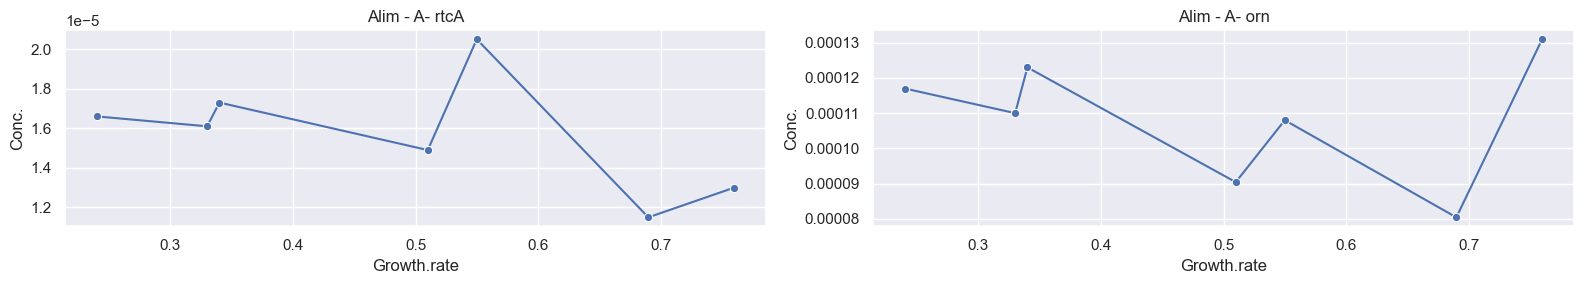

In [15]:
cols_per_figure = 2

for i in range(0, Alim_fA.shape[1]-1, cols_per_figure):
    fig, axes = plt.subplots(nrows=1, ncols=Alim_fA.shape[1]-1, figsize=(16, 3))
    axes = axes.flatten()  
    
    for j, col in enumerate(Alim_fa.columns[i:i+cols_per_figure]):
        ax = axes[j]
        sns.lineplot(x=Alim_fa['Growth.rate'], y=Alim_fa[col], ax=ax, marker='o')
        ax.set_title(f'Alim - A- {col}')
        #ax.set_xlabel('Lambda')
        ax.set_ylabel('Conc.')
    
    plt.tight_layout()
    plt.show()

In [ ]:
 Alim_fA.shape[1]